# CS229, Fall 2017
## Problem Set 3: Deep Learning & Unsupervised Learning

This is my solutions for CS229 - Fall 2017: Machine Learning taught by Andrew Ng.

The material for Problem Set 3 is here: [ps3](https://github.com/nmduonggg/ML-CS229/blob/master/Problem%20Set%203/ps3.pdf)

This notebook contains the solution for __Question 5: K-means for compression__

### Quesion 5.a)

In [72]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [2]:
A = imread('data\mandrill-large.tiff')

In [3]:
A

array([[[164, 150,  71],
        [ 63,  57,  31],
        [ 75,  43,  10],
        ...,
        [117, 119,  68],
        [141, 170, 101],
        [179, 188, 118]],

       [[120, 125,  62],
        [135,  97,  33],
        [ 55,  35,  23],
        ...,
        [122, 140,  98],
        [136, 159, 128],
        [120, 138,  74]],

       [[ 99,  74,  31],
        [132, 118,  46],
        [ 60,  41,  36],
        ...,
        [118,  93,  90],
        [ 87,  91,  77],
        [ 96,  80,  49]],

       ...,

       [[121, 148, 155],
        [123, 156, 150],
        [124, 150, 139],
        ...,
        [110,  73,  60],
        [ 90,  93,  70],
        [ 81,  80,  60]],

       [[126, 169, 168],
        [117, 151, 151],
        [121, 136, 133],
        ...,
        [ 73,  84,  68],
        [ 99,  69,  86],
        [ 80,  63,  71]],

       [[  9,  11,  12],
        [ 10,  12,  11],
        [ 11,  15,  12],
        ...,
        [  5,   8,   5],
        [  2,   5,   0],
        [  4,   5,   2]]

In [7]:
# rgb vector
A[1,1,:]

array([135,  97,  33], dtype=uint8)

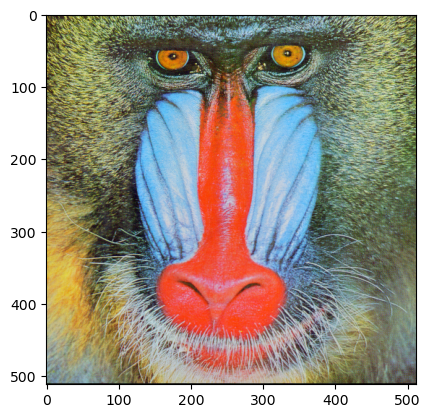

In [8]:
plt.imshow(A)
plt.show()

### Question 5.b)

In [12]:
X = imread('data\mandrill-small.tiff')

In [106]:
flatten_X = X.reshape(-1, X.shape[-1])
flatten_X.shape

(16384, 3)

In [168]:
def kmeans(x, k):
    centroids = np.array([x[i] for i in np.random.randint(0, x.shape[0], k)])
    centroid_id = np.zeros(x.shape[0])
    num_iteration = 0
    centroid_change = 99999999
    final_im = np.empty(x.shape)
    
    while centroid_change > 1e-10:
        for i in range(x.shape[0]):
            distances = np.sum((x[i] - centroids)**2, axis = 1)
            min_id = np.argsort(distances)[0]
            centroid_id[i] = min_id
            
        old_centroids = copy.deepcopy(centroids)
        for c in range(k):
            new_centroid = np.mean([x[i] for i in range(x.shape[0]) if centroid_id[i] == c], axis = 0)
            centroids[c] = new_centroid
        centroid_change = np.sum((centroids - old_centroids)**2)
        num_iteration += 1
        
    for i in range(x.shape[0]):
        cid = int(centroid_id[i])
        final_im[i] = centroids[cid]
    
    return centroids, final_im, num_iteration, centroid_change

In [170]:
centroids, final_im, num_iteration, last_centroid_change = kmeans(flatten_X / 255, 16) 

centroids

array([[0.79937505, 0.66359659, 0.29786735],
       [0.47534702, 0.52076141, 0.43886116],
       [0.22315829, 0.21897693, 0.17607472],
       [0.54688725, 0.60690257, 0.56438113],
       [0.70154664, 0.66501008, 0.63398937],
       [0.68536516, 0.42718102, 0.17098608],
       [0.86463287, 0.40520964, 0.39433146],
       [0.37353408, 0.42097806, 0.34973623],
       [0.61916128, 0.61652594, 0.41478372],
       [0.5057304 , 0.48847938, 0.29468988],
       [0.46941403, 0.72665533, 0.89882806],
       [0.62569505, 0.75609087, 0.86458516],
       [0.32272247, 0.33889614, 0.25621993],
       [0.93388158, 0.30381837, 0.1871388 ],
       [0.36586572, 0.46507903, 0.50761735],
       [0.39668534, 0.57951447, 0.74164332]])

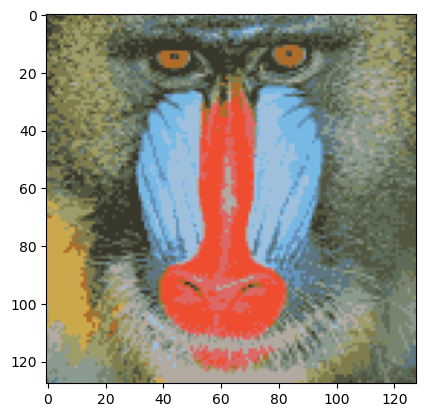

In [171]:
final_im = final_im.reshape(X.shape)
plt.imshow(final_im)
plt.show()

### Question 5.c)

In [179]:
flatten_A = A.reshape(-1, A.shape[-1]) / 255
centroids, final_im, num_iteration, last_centroid_change = kmeans(flatten_A, 16)

centroids

array([[0.38331113, 0.5414282 , 0.66871581],
       [0.65002274, 0.7699841 , 0.86544206],
       [0.72565891, 0.72373035, 0.69480446],
       [0.87968059, 0.41378334, 0.41670373],
       [0.41844171, 0.43164194, 0.28375152],
       [0.55886043, 0.63265997, 0.59159268],
       [0.44906577, 0.51491523, 0.45410964],
       [0.61549916, 0.42225145, 0.20672143],
       [0.71059062, 0.70662051, 0.4971224 ],
       [0.31748091, 0.39042327, 0.39864304],
       [0.58699608, 0.58033575, 0.36535114],
       [0.1910709 , 0.17320036, 0.15562198],
       [0.4700289 , 0.72191544, 0.89211023],
       [0.29815677, 0.3021942 , 0.22559339],
       [0.79370277, 0.6689591 , 0.28149447],
       [0.93287348, 0.3014996 , 0.17551833]])

In [180]:
num_iteration

332

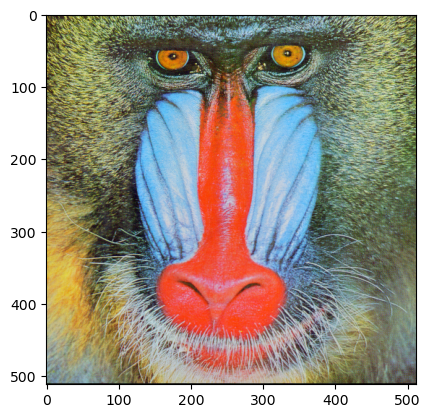

In [182]:
plt.imshow(A)
plt.show()

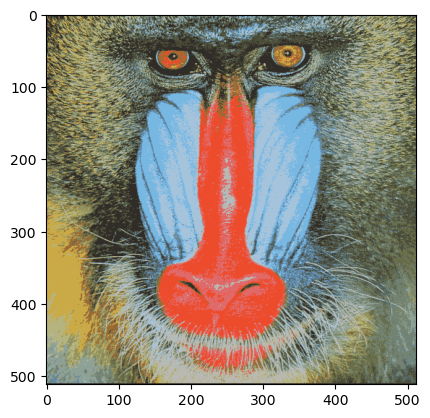

In [181]:
final_im = final_im.reshape(A.shape)
plt.imshow(final_im)
plt.show()

### Question 5.d)

If we represent the image with these reduced colors, we compressed the data by $\frac{512^2}{16^2} = 1024$ times